
Task-01

Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
df=pd.read_csv('/content/data.csv')

In [4]:
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1659,2014-06-01 00:00:00,243000.0,3.0,1.75,1790,12000,1.0,0,0,3,1040,750,1960,2012,23042 16th Ave S,Des Moines,WA 98198,USA
146,2014-05-05 00:00:00,416286.0,3.0,2.50,1408,989,3.0,0,0,3,1408,0,2005,0,7809 12th Ave NE,Seattle,WA 98115,USA
163,2014-05-06 00:00:00,650000.0,3.0,1.50,1630,7475,1.0,0,1,3,1160,470,1940,1996,6009 52nd Ave NE,Seattle,WA 98115,USA
3814,2014-07-02 00:00:00,435000.0,3.0,2.50,1900,7984,2.0,0,0,3,1900,0,1993,0,Tolt Pipeline Trail,Bothell,WA 98011,USA
2912,2014-06-19 00:00:00,734990.0,4.0,2.50,2650,6884,2.0,0,0,3,2650,0,2012,1912,Eastridge Drive Promenade,Redmond,WA 98053,USA


In [5]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [6]:
df.drop(['date','waterfront','view','condition','street','city','statezip','country'],axis=1,inplace=True)

In [7]:
df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated
867,366500.0,4.0,2.75,2070,9300,1.0,1120,950,1945,0
2991,337000.0,4.0,3.00,2240,8504,2.0,2240,0,1992,0
2179,315000.0,3.0,2.50,1480,1590,2.0,1150,330,2010,0
3631,300000.0,2.0,1.00,960,8153,1.0,960,0,1947,2012
2995,448000.0,4.0,2.50,2510,6853,2.0,2510,0,2006,0


In [9]:
correlation=df[['price','bedrooms','bathrooms','sqft_living']].corr()

In [10]:
correlation

,price,bedrooms,bathrooms,sqft_living
price,1.000000,0.200336,0.327110,0.430410
bedrooms,0.200336,1.000000,0.545920,0.594884
bathrooms,0.327110,0.545920,1.000000,0.761154
sqft_living,0.430410,0.594884,0.761154,1.000000


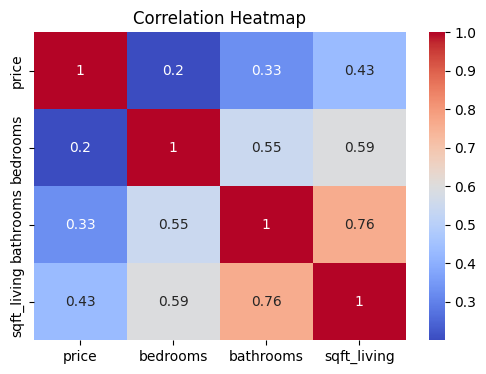

In [12]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [24]:
x = df[['bedrooms', 'bathrooms', 'sqft_living']]
y = df['price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [35]:
model=linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [36]:
model.coef_

array([-61954.82503713,  -3226.3373931 ,    304.61395285])

In [37]:
model.intercept_

np.float64(111106.35554414545)

In [44]:
model.predict(X_test)

array([ 361912.40811227,  403300.87692575,  810321.30528671,
        587326.7332219 ,  441112.03585349,  714232.55895231,
        503422.54500153,  491864.37337118,  486578.67866244,
        498763.23677647,  777394.90470271,  273353.62328511,
        836078.14009265,  499750.01898934,  403931.9750277 ,
        619797.52195027,  673019.57638514,  733541.43059031,
        955283.22968775,  973154.41887553,  772334.66011265,
        686817.30319573,  638484.71872286,  467495.25714311,
        235186.78024645,  221569.25130046,  715264.59341926,
        817801.3029216 ,  389733.31185212,  692508.64588774,
       1554556.70921913,  353179.63751001, 1268895.94389537,
        492265.30973618,  198808.59215067,  441287.52209981,
        878724.09349177,  785942.7658221 ,  287552.28646069,
        614741.98897848,  428927.47773946,  376516.71927113,
        475200.70489668,  415084.49867478,  304215.9549352 ,
        319446.65257774,  503647.99512021,  443707.27514464,
        753426.72483964,

In [38]:
model.predict([[4,2,2070]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([487385.26301071])

price = m1.bedrooms + m2.bathrooms + m3.sqft_living + c

In [42]:
(-61954.82503713*4)+(-3226.3373931*2)+(304.61395285*2070)+111106.35554414545


487385.2630089255